In [2]:
from asyncio.windows_events import INFINITE, NULL
import math
import heapq
import time
import os
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
from collections import defaultdict

# Class to represent a graph


class Graph:

    def __init__(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = [] # default dictionary
        # to store graph

    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)

        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot

        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):

        result = [] # This will store the resultant MST
        
        # An index variable, used for sorted edges
        i = 0
        
        # An index variable, used for result[]
        e = 0

        # Step 1: Sort all the edges in
        # non-decreasing order of their
        # weight. If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph,
                            key=lambda item: item[2])

        parent = []
        rank = []

        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:

            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            # If including this edge doesn't
            # cause cycle, include it in result
            # and increment the indexof result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge

        minimumCost = 0
        print ("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            #print("%d -- %d == %d" % (u, v, weight))
        #print("Minimum Spanning Tree" , minimumCost)
        return minimumCost

In [4]:
def plotResult(val):
    #sort the keys (number of vertices) of the dictionary and plot them
    plt.plot(*zip(*sorted(val) ),':k')

    # x-axis label
    plt.xlabel('Number of Vertices')
    # frequency label
    plt.ylabel('Execution Time')
    # plot title
    plt.title('Naive Kruskal Algorithm Plot')
    #maximize the plot size 
    #figManager = plt.get_current_fig_manager()
    #figManager.window.showMaximized()
    # function to show the plot
    plt.show()


In [6]:
import time

#at the start of cell, define <tic> variable
tic = time.time()
# Driver code
g = Graph(10)
g.addEdge(0 ,1 ,4188)
g.addEdge(1 ,2 ,-4502)
g.addEdge(2 ,3 ,6938)
g.addEdge(3 ,4 ,3256)
g.addEdge(4 ,5 ,7605)
g.addEdge(5 ,6 ,8856)
g.addEdge(6 ,7 ,-7786)
g.addEdge(7 ,8 ,9244)
g.addEdge(7 ,3 ,5906)
g.addEdge(8 ,9 ,7091)
g.addEdge(8 ,5 ,-5756)



# Function call
g.KruskalMST()

#at the end of cell, define <toc> variable
toc = time.time()

#store execution time in variable. Note the unit of the result is seconds
time_taken = toc - tic 

Edges in the constructed MST


Weight:			Time:			Vertices:			File:
Edges in the constructed MST
16940                0.0                            10                   input_random_01_10
Edges in the constructed MST
16940                0.0                            10                   input_random_02_10
Edges in the constructed MST
16940                0.0                            10                   input_random_03_10
Edges in the constructed MST
16940                0.0009965896606445312          10                   input_random_04_10
Edges in the constructed MST
16940                0.0                            20                   input_random_05_20
Edges in the constructed MST
16940                0.0                            20                   input_random_06_20
Edges in the constructed MST
16940                0.0                            20                   input_random_07_20
Edges in the constructed MST
16940                0.0                            20                   input_random_08

Edges in the constructed MST
16940                0.0                            100000               input_random_68_100000
------------------------------------------------

Size		Time of result		Asymptotic Complexity
------------------------------------------------------------
     10            0.0                                       0.000000
     10            0.0                                       0.000000
     10            0.0                                       0.000000
     10            0.0009965896606445312                      0.022947
     20            0.0                                       0.000000
     20            0.0                                       0.000000
     20            0.0                                       0.000000
     20            0.0                                       0.000000
     40            0.0                                       0.000000
     40            0.0                                       0.000000
     40            

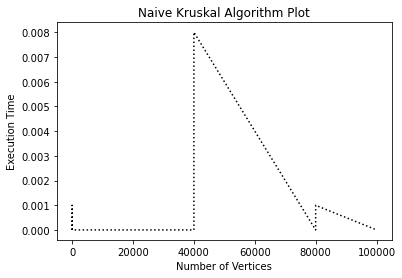

In [9]:
def printSizeTime(verticeEdgeTime):
    print("Size\t\tTime of result\t\tAsymptotic Complexity")
    print(60*"-")
    for i in range(len(verticeEdgeTime)):
        print(f"{verticeEdgeTime[i][0]:7d} {' ':10s} {str(verticeEdgeTime[i][2]):20s}{(verticeEdgeTime[i][2]*(abs(verticeEdgeTime[i][1])* math.log(abs(verticeEdgeTime[i][0])))):30f}")
    print(60*"-")
    
if __name__ == '__main__':
    directory = 'C:\\Users\\Fahad\\Desktop\\Advanced Algorithms\\mst_dataset'
    mapVertice_time = []
    vertice_edge_time = []
    weights=[]
    num_instances = 0 #count number of files
    totalTime = time.time()
    
    print('Weight:\t\t\tTime:\t\t\tVertices:\t\t\tFile:')

    # iterate over files in that directory
    for filename in os.listdir(directory): 
        
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f): 
            num_instances = num_instances +1
            #read from the file and split it line by line
            graphRead, graph = open(f).read().splitlines(), {} 
            #count the number of edges of a graph
            edgesCount = graphRead[0].split()[1] 
            #count the number of node of a graph
            verticesCount = graphRead[0].split()[0] 
            #start reading from second line onwards, since first line displays number of nodes and edges
            for line in graphRead[1:]:
                edge = list(map(int, line.split()))
                #add the node to the graph and initialize it with an empty list 
                if edge[0] not in graph: 
                    graph[edge[0]] = []
                if edge[1] not in graph:
                    graph[edge[1]] = []
                if edge[2] not in graph:
                    graph[edge[2]] = []

                #For each node u, append the map of second node v along with the weight (u,v) of the edge
                #For each node v, append the map of second node u along with the weight (u,v) of the edge
                graph[edge[0]].append(edge[1:])
                graph[edge[1]].append([edge[0:]])
                graph[edge[2]].append([edge[2:]])
                u=graph[edge[0]]
                v=graph[edge[1]]
                #Yahan pe weight store karwana hai
                w=graph[edge[2]]
                
            #calculate the time of prim's algorithm on one graph
            start = time.time() 
            weight = g.KruskalMST()
            end_start = float(time.time() - start)
            #append the obtained weight to the weights list to displayed it at the end and in the graph
            weights.append(weight) 

            #add the time taken corresponding to the number of nodes in a map for each graph to plot it at the end in a line chart
            mapVertice_time.append((int(verticesCount), end_start) ) 
            vertice_edge_time.append((int(verticesCount), int(edgesCount), end_start))

            print(f"{str(weight):20s} {str(end_start):30s} {verticesCount:20s} {str(Path(f).stem):10s}")

    print("------------------------------------------------\n")
        
        
    finalTotalTime = (time.time() -totalTime)    
    printSizeTime(vertice_edge_time)
    print("Average time (s):", finalTotalTime/num_instances , "\tTotal time (s):", finalTotalTime, "\nWeights: ", weights,"\n" )

    #print(mapVertice_time)
    #used to plot the result obtained as in the time needed given a certain number of edges
    plotResult(mapVertice_time)


In [114]:
ReaderData()

Enter file name: input_random_01_10.txt
   u    v     w
------------------
   0    1    4993
   1    2    1392
   2    3    8856
   3    4    -433
   4    5    6590
   5    6    -7462
   6    7    6658
   7    8    -976
   8    9    9698


In [115]:
ver=len(us)
ver

9

In [117]:
import time

#at the start of cell, define <tic> variable
tic = time.time()
# Driver code
g = Graph(ver+1)
for i in range(0,ver):
    #print(i)
    g.addEdge(us[i], vs[i], ws[i])
# Function call

g.KruskalMST()

#at the end of cell, define <toc> variable
toc = time.time()

#store execution time in variable. Note the unit of the result is seconds
time_taken = toc - tic 

#Time Taken 
time_series=[]
time_series.append(time_taken)
print(time_taken)

Edges in the constructed MST
5 -- 6 == -7462
7 -- 8 == -976
3 -- 4 == -433
1 -- 2 == 1392
0 -- 1 == 4993
4 -- 5 == 6590
6 -- 7 == 6658
2 -- 3 == 8856
8 -- 9 == 9698
Minimum Spanning Tree 29316
0.0019965171813964844


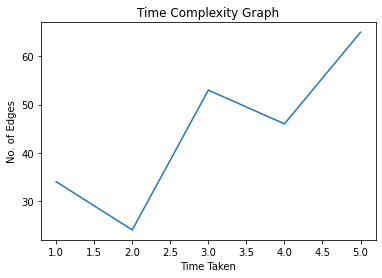

In [76]:
import matplotlib.pyplot as plt

timetaken=[0.5664,0.0797,0.000343,1.56]
edge=[12,8,6,30]

plt.plot(x, y)
plt.xlabel('Time Taken')
plt.ylabel('No. of Edges')

plt.title('Time Complexity Graph')


plt.show()